<a href="https://colab.research.google.com/github/btomazela/puc-cd-ml-trab/blob/master/puc-cd-ml-trab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Especialização em Ciência de Dados - PUC-Rio
# Machine Learning - Prof. Tatiana Escovedo
# Projeto completo de Classificação Binária


## 1. Definição do Problema

O dataset usado neste projeto será o **Adult Data Set**, proveniente originalmente do banco de dados do censo norte americano de 1994. Seu objetivo é prever se uma pessoa ganha mais de `$50k` ao ano, com base em um conjunto de características sócio-econômicas. Este dataset é um subconjunto do dataset original e aqui, todos as pessoas são maiores de 16 anos (`age > 16`), trabalham pelo menos 1 hora por semana (`hours-per-week > 0`), representam mais de uma 1 pessoa da população (`fnlwgt > 1`) e um quarto filtro que deduzimos ser o sálário bruto maior que $100 (`agi > 100`, referência: https://www.census.gov/programs-surveys/saipe/guidance/model-input-data/income-tax.html).

O dataset apresenta diversos atributos relacionados a dados sócio-econômicos e uma variável de classe binária (`>50K` ou `<=50K`). As variáveis ​​preditoras incluem a idade, o grau de escolaridade, o estado civil, raça, sexo, dentre outros. Para mais detalhes sobre este dataset, consulte: https://archive.ics.uci.edu/ml/datasets/Adult


**Informações sobre os atributos:**
1. '>50K', '<=50K' (Class/Income)
2. age: continuous.
3. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
4. fnlwgt: continuous.
5. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
6. education-num: continuous.
7. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
8. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
9. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
10. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
11. sex: Female, Male.
12. capital-gain: continuous.
13. capital-loss: continuous.
14. hours-per-week: continuous.
15. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

In [ ]:
#teste github

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import missingno as ms # para tratamento de missings

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# from matplotlib import cm
# from pandas import set_option
# from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler # para padronização
from sklearn.preprocessing import MinMaxScaler # para normalização
from sklearn.preprocessing import OneHotEncoder # para one-hot encoding e dummies
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import time
from datetime import datetime, timezone, timedelta

# seed para o gerador de números aleatórios
seed = 13
np.random.seed(seed)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=UserWarning)

## 2. Carga de Dados

Iremos usar o pacote Pandas ( Python Data Analysis Library) para carregar de um arquivo .csv sem cabeçalho disponível online.

Com o dataset carregado, iremos explorá-lo um pouco.

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# Informa o cabeçalho das colunas
attributes = ['age', 
              'workclass', 
              'fnlwgt', 
              'education', 
              'education-num', 
              'marital-status', 
              'occupation', 
              'relationship', 
              'race', 
              'sex', 
              'capital-gain', 
              'capital-loss', 
              'hours-per-week', 
              'native-country', 
              'income']

# Lê o arquivo utilizando as colunas informadas
dataset = pd.read_csv(url_train, names=attributes,  index_col=False)

Exibindo as primeiras 5 linhas do dataset para verificar se foi carregado corretamente.

In [ ]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Exibindo as últimas 5 linhas do dataset para verificar se foi carregado corretamente.

In [ ]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 3. Análise de Dados

### 3.1. Estatísticas Descritivas

Vamos iniciar examinando as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [ ]:
# Mostra as dimensões do dataset
print(dataset.shape)

(32561, 15)


In [ ]:
# Mostra as informações do dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


Pelo resultado do comando `dataset.info` não identificamos valores faltantes. Entretanto, executando o comando `dataset.workclass.value_counts()` verificamos que os atributos `workclass`, `occupation` e `native-country` possuem o valor `?`, que trataremos como valores faltantes.

In [ ]:
for col in dataset.columns:
  print(dataset[col].value_counts())
  print('\n------\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

------

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

------

164190    13
203488    13
123011    13
113364    12
121124    12
          ..
284211     1
312881     1
177711     1
179758     1
229376     1
Name: fnlwgt, Length: 21648, dtype: int64

------

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
N

Verificando o tipo de cada atributo para identificar qual a técnica de pré-processamento adequada para cada um. Verificamos que alguns atributos são categóricos. Dessa forma, teremos que aplicar a técnica de one-hot-encoding ou dummy-encoding antes de passar esse dataset como entrada para alguns algoritmos de machine learning.

In [ ]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Pelo resumo estatístico do dataset, vemos que os atributos `capital-gain` e `capital-loss` possuem muitos valores zerados, pois tanto os valores mínimo e primeiro, segundo e terceiro quartis possuem valor `0`. Essa análise sugere que esses atributos podem ser removidos do dataset.

In [ ]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Vamos agora verificar se o dataset tem as classes balanceadas para que possamos tratar o desbalanceamento posteriormente, se necessário. Vemos que as classes `<=50K` e `>50K` estão desbalanceadas. Isso sugere que possivelmente precisaremos realizar algum tipo de tratamento/pré-processamento.

In [ ]:
# distribuição das classes
print(dataset.groupby('income').size())

income
 <=50K    24720
 >50K      7841
dtype: int64


### 3.2. Visualizações Unimodais

Vamos criar agora um histograma para cada atributo numérico do dataset. Mais uma vez, vemos que os atributos `capital-gain` e `capital-loss` possuem muitos número próximos de zero, reforçando a possibilidade de remover o atributo do dataset. A idade, representada pelo atributo `age`, se concentra entre 15 e 45 anos. E a maioria das pessoas trabalha por volta de 40 horas por semana, o que acreditamos que seja o "normal". Entretanto, algumas poucas chegam a trabalhar até próximo de 100 horas por semana, sugerindo a ocorrência de outliers ou mesmo de dados incorretos.

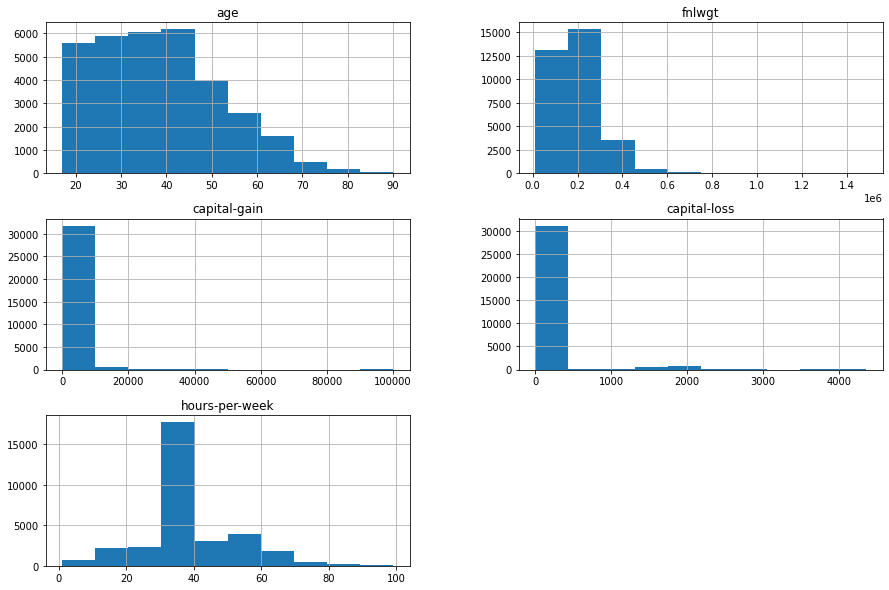

In [ ]:
# Histograma
dataset.hist(figsize = (15,10), column=['age','fnlwgt','capital-gain','capital-loss','hours-per-week'], bins=10)
plt.show()

O atributo `education-num` é a versão numérica do atributo `education`, que é uma variável categórica ordinal e possui 16 valores possíveis, conforme mencionado na descrição do dataset. Por isso, fizemos o histograma desse atributo separado dos demais para conseguir configurar a quantidade de bins de forma adequada. Entendemos que o histograma desse atributo fica mais semântica com 8 bins ao invés de 10.

Por esse gráfico, vemos que há uma concentração de pessoas com os níveis de escolaridade 9 e 10, que representam 'formados no ensino médio' e com 'ensino superior incompleto', respectivamente. Vemos também um 'pico' de bacharéis e mestres - 13 e 14, respectivamente.

Pela análise dos histogramas, não identificamos atributos que possam ser considerados/aproximados como tendo distribuição normal.

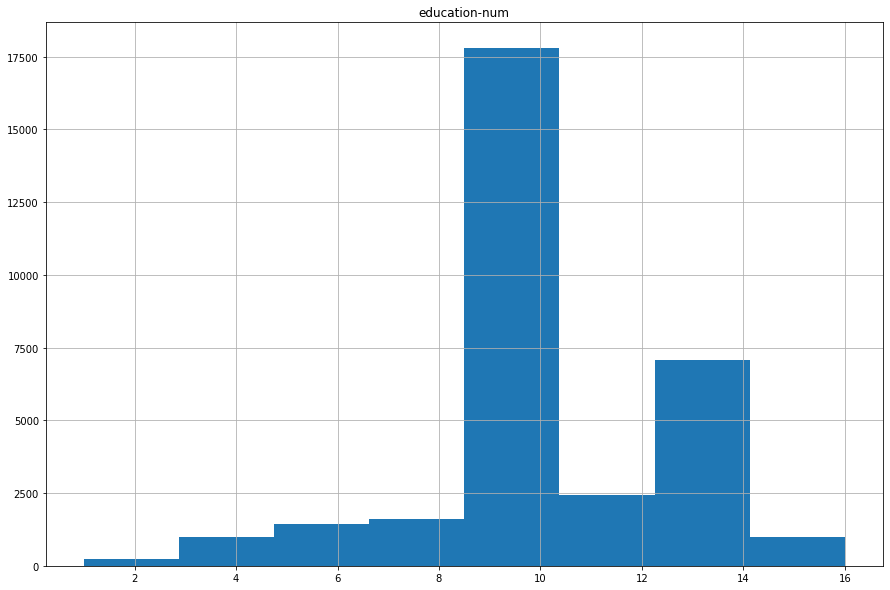

In [ ]:
dataset.hist(figsize = (15,10), column=['education-num'], bins=8)
plt.show()

Vamos criar agora um gráfico de densidade para cada atributo numérico do dataset, para avaliarmos melhor a distribuição dos dados.

Os gráficos de densidade corroboram para nosso entendimento inicial de que nenhum atributo numérico pode ser considerado/aproximado como tendo distribuição normal.

O gráfico do atributo education-num também evidencia que ele possui uma distribuição bimodal.

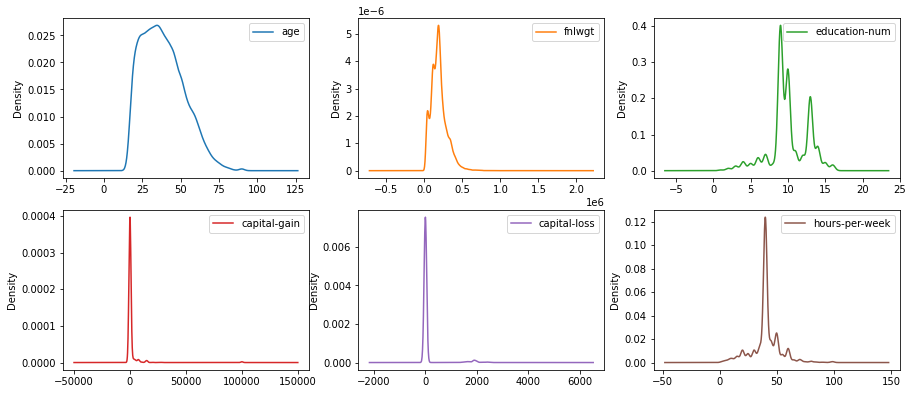

In [ ]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

Criaremos gráficos do tipo boxplot para os atributos numéricos para analisarmos a dispersão dos dados e para tentarmos identificar possíveis outliers.

Nos gráficos bloxplot vemos que as dispersões dos atributos do dataset são bem diferentes. 

Tirando os atributos capital-gain e capital-loss, que já identificamos que devem ser excluídos por terem muitos dados zerados, todos os outros atributos possuem outliers, porém acreditamos que estes não sejam dados incorretos ou inconsistentes. 

O atributo hours-per-week chama atenção por estar extremamente concentrado próximo de 40h, e com isso são sugeridos muitos outliers. Após discussão interna pelo grupo, acreditamos que estes outliers não representam dados incorretos.

*OBS: Se um ponto do dataset é muito distante da média (acima de 3 desvios padrão da média), pode ser considerado outlier.*

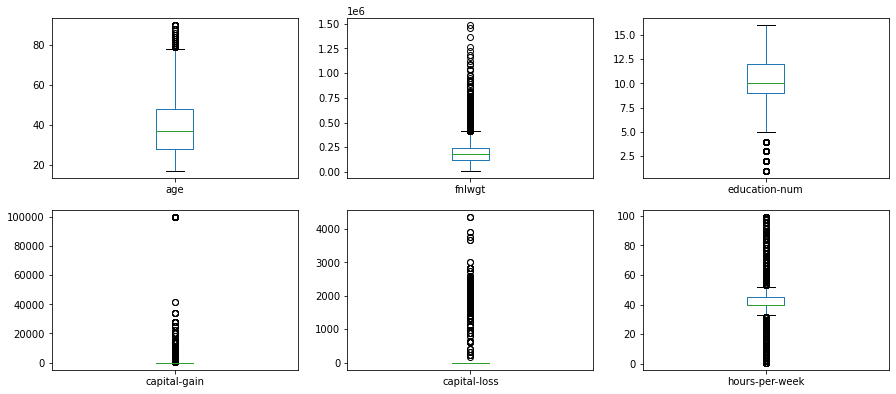

In [ ]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

Neste ponto faremos algumas análises dos atributos categóricos.

Para isso precisaremos retirar os valores " ?" de todos os atributos do dataset. Criaremos um dataset só com os atributos categóricos e substituiremos os valres " ?" por nan.





In [ ]:
# Definindo um novo dataset, considerando apenas os atributos categóricos.
dataset_cat = dataset.select_dtypes(include = 'object').copy()

# substituindo os " ?" por NaN
dataset_cat.replace(' ?', np.nan, inplace=True)

dataset_cat.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Antes de analisarmos graficamente estes atributos, vamos aproveitar este momento para reforçar alguns pontos já citados nas análises descritivas. Podemos constatar que education, marital-status e native-country possuem domínios relativamente grandes (acima de 10), o que pode gerar um número excessivo de colunas durante o pre-processamento dos dados, e também que workclass, occupation e native-country possuem valores missing que deverão ser tratados.

In [ ]:
# Características dos atributos categóricos
# Contagem dos valores únicos por atributo categórico
# Verificação de dados faltantes
dataset_cat_stats = pd.DataFrame(columns = ['coluna', 'valores', 'contador_com_na', 'contador_sem_na', 
                                       'numero_missing', 'percentual_missing'])
tmp = pd.DataFrame()

for c in dataset_cat.columns:
    tmp['coluna'] = [c]
    tmp['valores'] = [dataset_cat[c].unique()]
    tmp['contador_com_na'] = len(list(dataset_cat[c].unique()))
    tmp['contador_sem_na'] = int(dataset_cat[c].nunique())
    tmp['numero_missing'] = dataset_cat[c].isnull().sum()
    tmp['percentual_missing'] = (dataset_cat[c].isnull().sum()/ len(dataset_cat)).round(3)*100
    dataset_cat_stats = dataset_cat_stats.append(tmp)

dataset_cat_stats

,coluna,valores,contador_com_na,contador_sem_na,numero_missing,percentual_missing
0,workclass,"[ State-gov, Self-emp-not-inc, Private, Fed...",9,8,1836,5.6
0,education,"[ Bachelors, HS-grad, 11th, Masters, 9th, ...",16,16,0,0.0
0,marital-status,"[ Never-married, Married-civ-spouse, Divorce...",7,7,0,0.0
0,occupation,"[ Adm-clerical, Exec-managerial, Handlers-cl...",15,14,1843,5.7
0,relationship,"[ Not-in-family, Husband, Wife, Own-child, ...",6,6,0,0.0
0,race,"[ White, Black, Asian-Pac-Islander, Amer-In...",5,5,0,0.0
0,sex,"[ Male, Female]",2,2,0,0.0
0,native-country,"[ United-States, Cuba, Jamaica, India, nan,...",42,41,583,1.8
0,income,"[ <=50K, >50K]",2,2,0,0.0


Analisando os atributos categóricos, verificamos que alguns estão bastante desbalanceados, como workclass, race e native-country. Estamos pensando em criar um dataset retirando estes atributos que talvez possam não ser relevantes na criação do modelo.

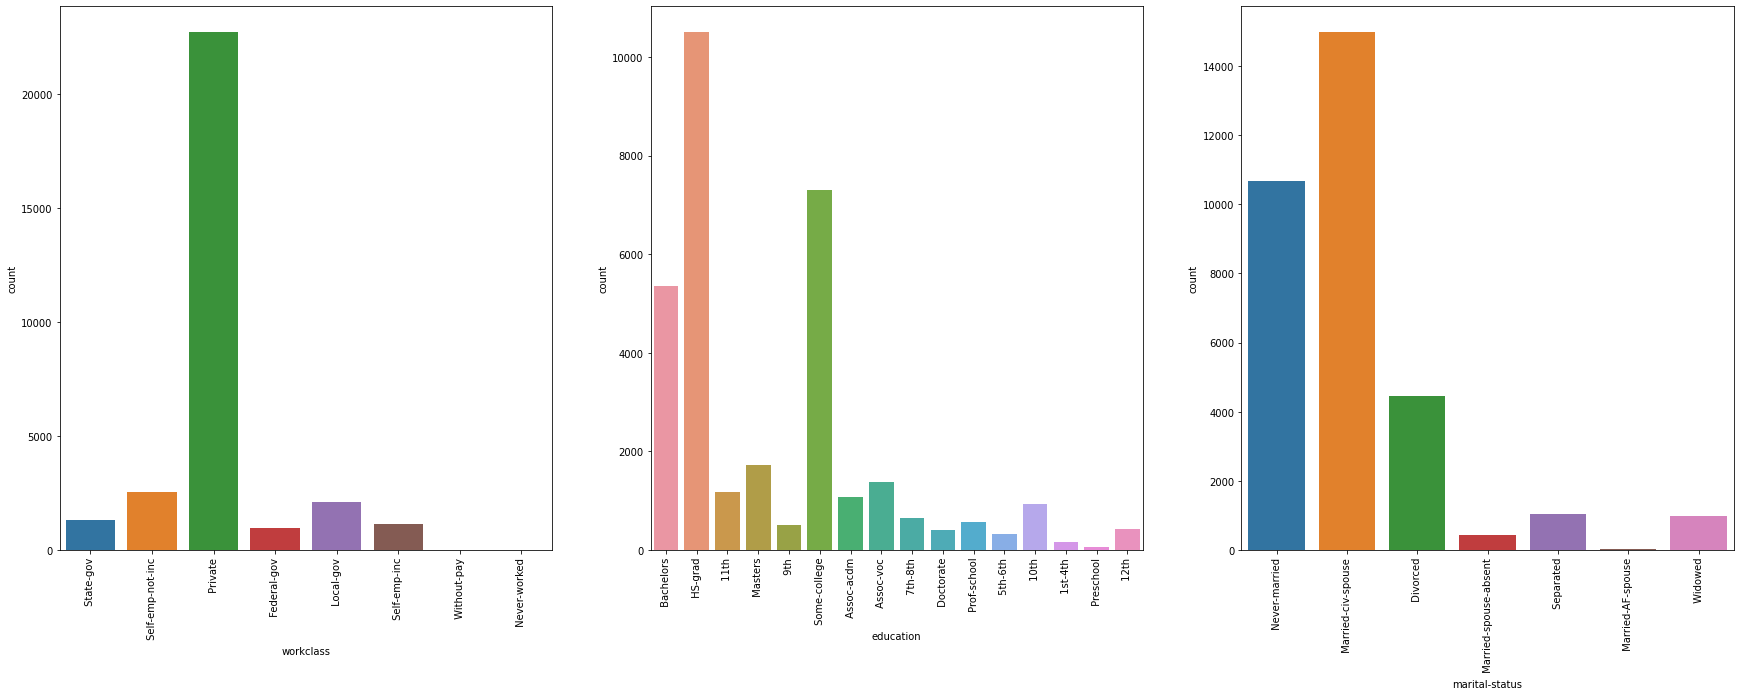

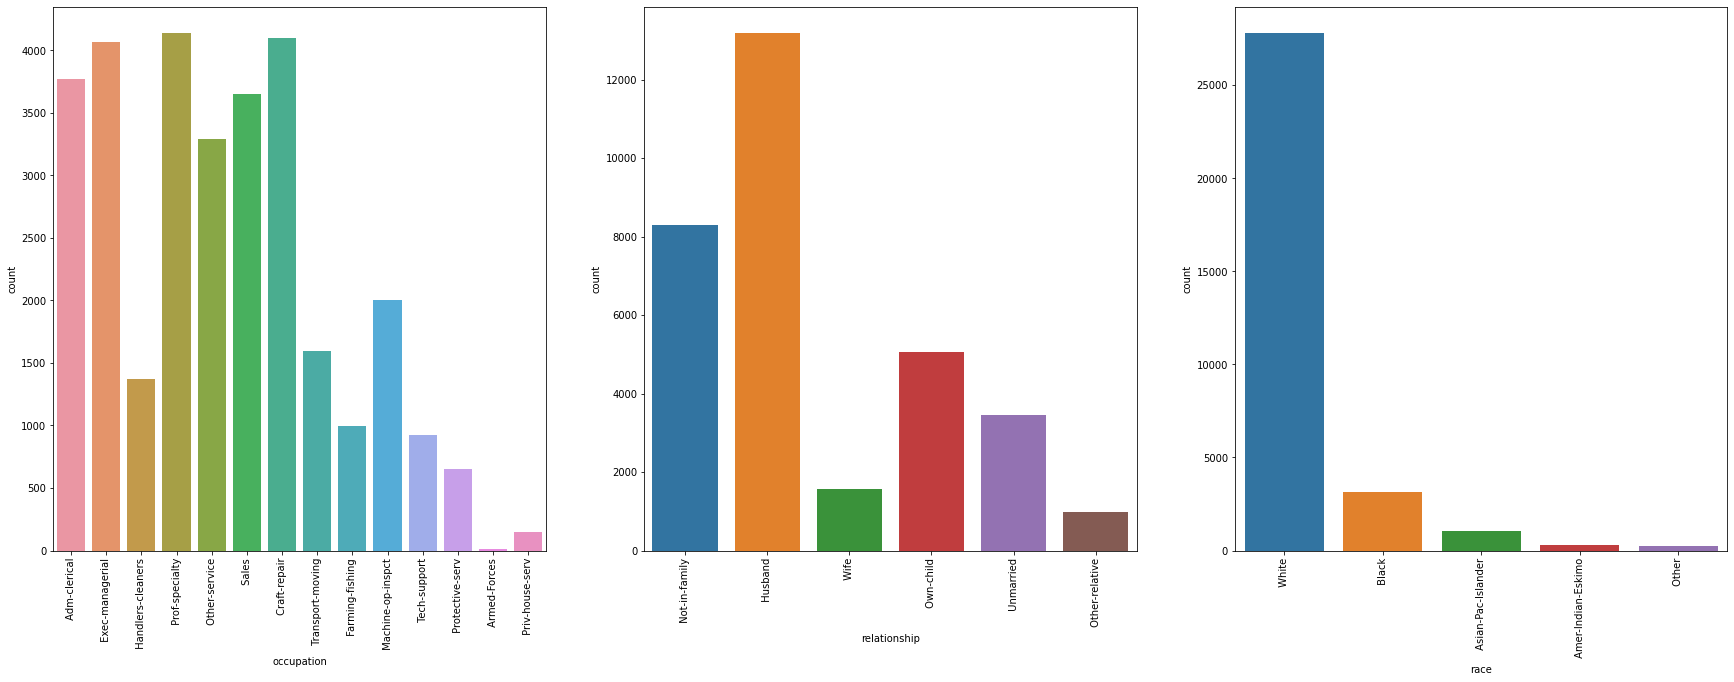

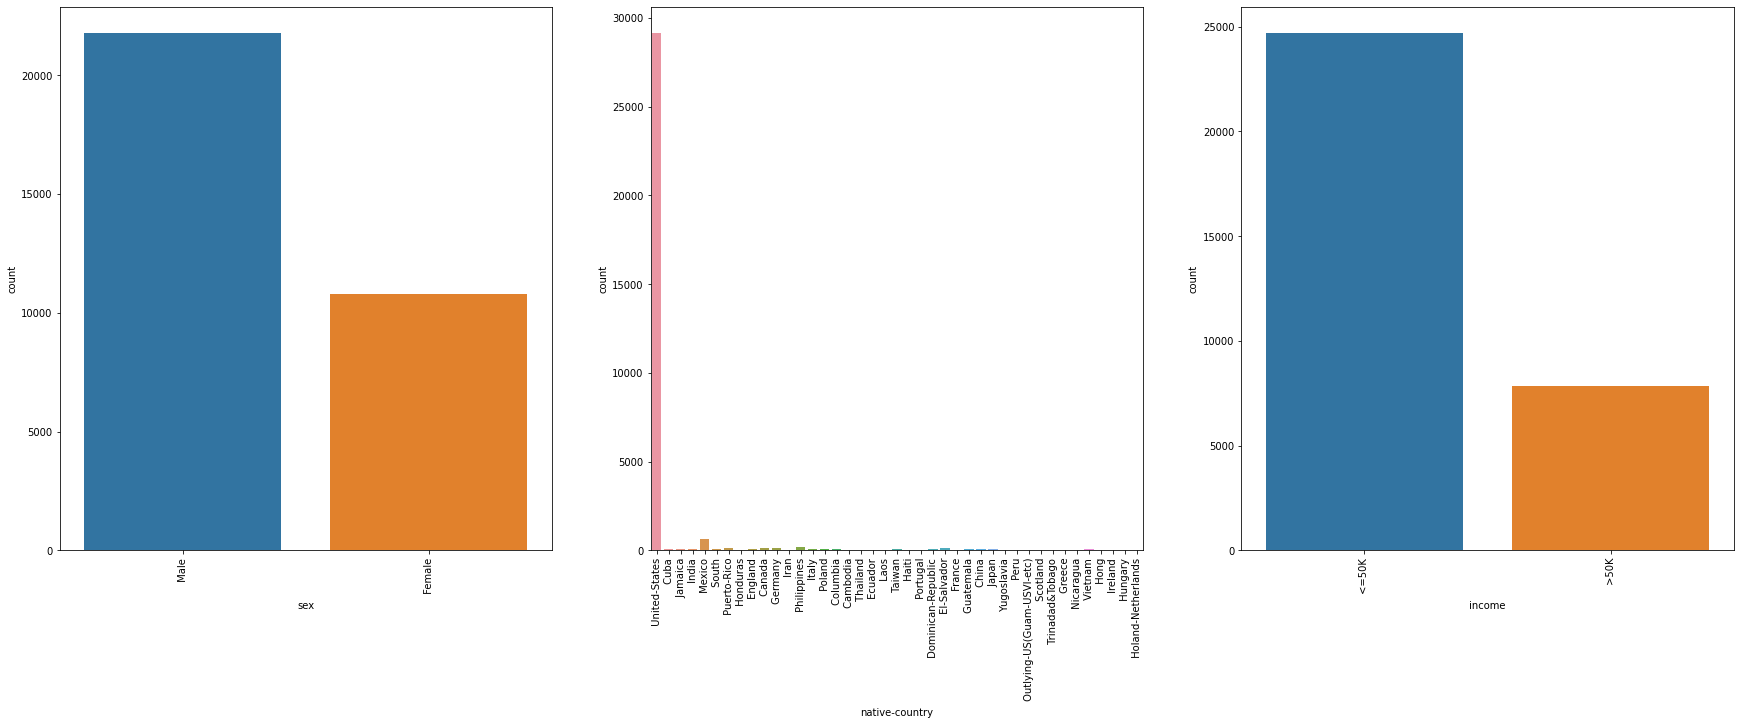

<Figure size 2160x720 with 0 Axes>

In [ ]:
# Geração de gráficos com a distribuição dos atributos categóricos por valores únicos

ix = 1
fig = plt.figure(figsize = (30,10))
for c in list(dataset_cat.columns):
  if ix <= 3:
    ax1 = fig.add_subplot(1,3,ix)
    sns.countplot(data = dataset_cat, x=c, ax = ax1)
    plt.xticks(rotation=90)
            
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (30,10))
        ix =1

### 3.3. Visualizações Multimodais

Vamos agora verificar a covariância entre as variáveis numéricas do dataset e para isso usaremos o coeficiente de correlação de Pearson.

Acreditamos que a forma mais intuitiva de analisar a covariância é através do gráfico de matriz de correlação. 

Analisando o gráfico fica claro que os atributos numéricos possuem pouco ou nenhum grau de correlação entre eles.

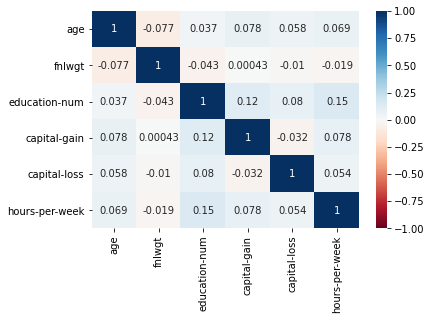

In [ ]:
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1);

Utilizaremos neste ponto gráficos de dispersão para cada par de atributos do dataset, para que possamos analisar os relacionamentos entre eles. Como podemos observar claramente, estes gráficos nos mostram que os atributos não possuem correlação entre eles.

In [ ]:
sns.pairplot(dataset, height = 2.5, hue='income');

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fbfad26e560> (for post_execute):


KeyboardInterrupt: ignored

## 4. Pré-Processamento de dados

### 4.1. Cópia do Dataset Original

Inicialmente, criaremos uma cópia do dataset para fazermos os tratamentos necessários, preservando o dataset original.


In [ ]:
# mantendo uma cópia do dataset original
datasetOK = dataset.copy()

datasetOK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 4.2. Feature Selection

No processo de seleção de variáveis (feature selection) visamos identificar atributos que mais contribuem para a qualidade do modelo, excluindo aqueles fortemente correlacionados entre si ou que não contribuam para a determinação da classe, desta forma, obtendo ganhos de performance na execução dos algoritmos, simplificação e melhor entendimento do modelo gerado.

O atributo education-num é a versão numérica do atributo education, ambos representando a mesma informação e, portanto, sendo redundantes. Com isso, podemos excluir um deles. Escolhemos apagar a coluna education que é categórica e manter a coluna education-num, que é numérica.

Identificamos que o atributo fnlwgt é um peso dado ao registro na população como um todo, considerando as características sócio-econômicas do registro, no entanto, o dataset é uma coleção de dados dos 51 estados americanos e o atributo fnlwgt só faz sentido no estado de origem, desta forma, assim como outros trabalhos com o mesmo dataset, consultados por nós, optamos por remover este atributo do modelo.


In [ ]:
# Exclusão dos atributos education e fnlwgt
datasetOK.drop(columns=['education', 'fnlwgt'], inplace=True)

datasetOK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      32561 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  32561 non-null  object
 12  income          32561 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


### 4.3. Tratamento de Missing Values

Conforme observamos na análise exploratória, os atributos `workclass`, `occupation` e `native-country` possuem quantidade expresiva de valores `?`, que trataremos como valores faltantes. Por se tratarem de atributos categóricos, faremos a substituição pela Moda.

Também como observado na análise exploratória, os atributos `capital-gain` e `capital-loss` possuem a maior parte de seus valores zerados, pois tanto os valores mínimo, quanto os do primeiro, segundo e terceiro quartis possuem valor `0`. Desta forma, iremos remover esses atributos do modelo.

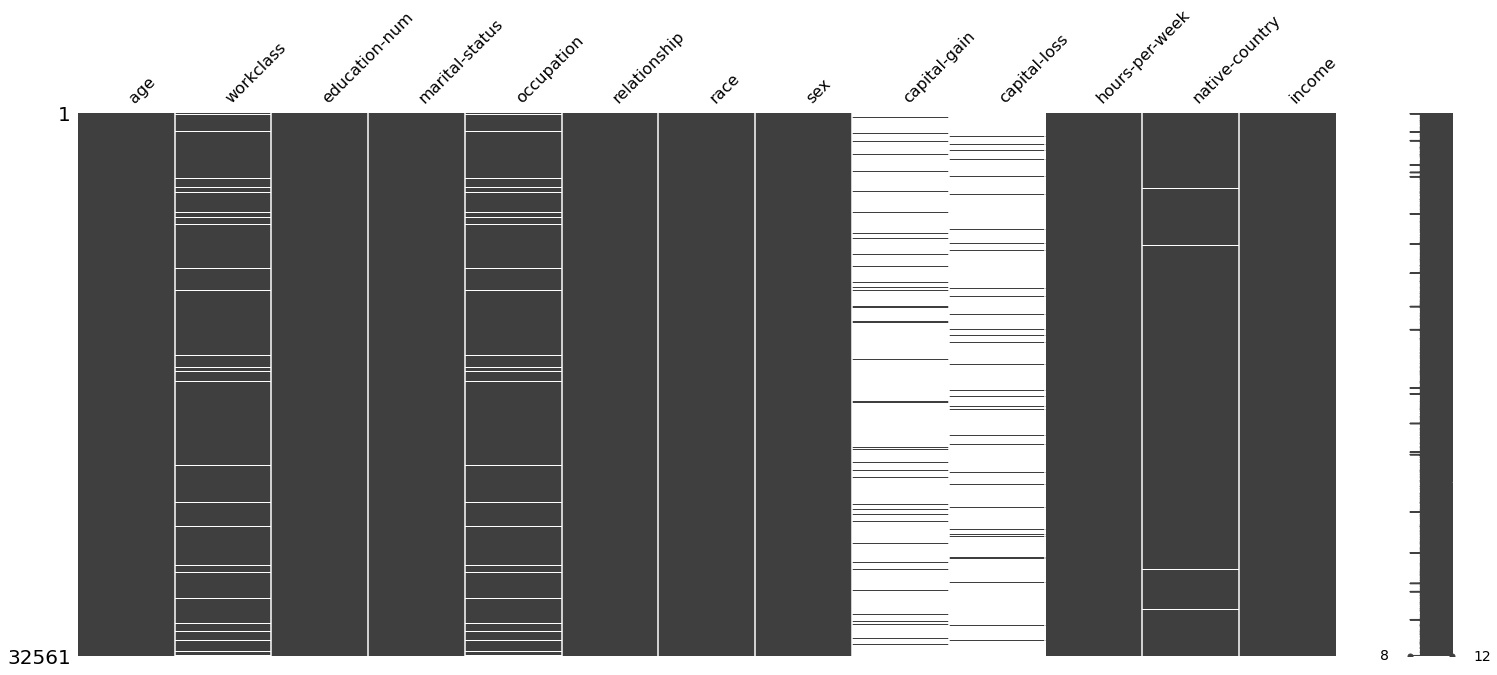

In [ ]:
# Substituindo os " ?" por NaN no dataset
datasetOK.replace(' ?', np.nan, inplace=True)

# Substituindo os valores 0 por NaN nos atributos capital-gain e capital-loss
datasetOK['capital-gain'].replace(0, np.nan, inplace=True)
datasetOK['capital-loss'].replace(0, np.nan, inplace=True)

# Exibindo visualização matricial da nulidade do dataset
ms.matrix(datasetOK)

In [ ]:
# Exclusão dos atributos capital-gain e capital-loss
datasetOK.drop(columns=['capital-gain','capital-loss'], inplace=True)

datasetOK.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   hours-per-week  32561 non-null  int64 
 9   native-country  31978 non-null  object
 10  income          32561 non-null  object
dtypes: int64(3), object(8)
memory usage: 2.7+ MB


In [ ]:
'''
# OBSERVAÇÃO: APÓS A EXCLUSÃO DE CAPITAL-GAIN E CAPITAL-LOSS, NÃO HÁ ATRIBUTOS NUMÉRICOS COM NAN. POR QUE AQUI NÃO FOI FEITA A TRANSFORMAÇÃO APENAS DOS ATRIBUTOS WORKCLASS, OCUPATION E NATIVE-COUNTRY?
# Substituindo os valores NaN dos atributos workclass, occupation e native-country

#divisão das colunas por tipo de atributo e classe/target
numeric_features = ['age', 'education-num', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
target = ['income']

#nova versão usando o https://scikit-learn.org/stable/modules/impute.html#impute
ct = ColumnTransformer(transformers=[('numeric-missing-values', SimpleImputer(missing_values=np.nan, strategy='mean'), numeric_features),
                                     ('categorical-missing-values', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), categorical_features),
                                     ('passthrough', 'passthrough', target)])

datasetOK = pd.DataFrame(data=ct.fit_transform(datasetOK), columns=numeric_features + categorical_features + target)

# Exibindo visualização matricial para confirmar que todos os missing values foram tratados
ms.matrix(datasetOK)
'''

"\n# OBSERVAÇÃO: APÓS A EXCLUSÃO DE CAPITAL-GAIN E CAPITAL-LOSS, NÃO HÁ ATRIBUTOS NUMÉRICOS COM NAN. POR QUE AQUI NÃO FOI FEITA A TRANSFORMAÇÃO APENAS DOS ATRIBUTOS WORKCLASS, OCUPATION E NATIVE-COUNTRY?\n# Substituindo os valores NaN dos atributos workclass, occupation e native-country\n\n#divisão das colunas por tipo de atributo e classe/target\nnumeric_features = ['age', 'education-num', 'hours-per-week']\ncategorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']\ntarget = ['income']\n\n#nova versão usando o https://scikit-learn.org/stable/modules/impute.html#impute\nct = ColumnTransformer(transformers=[('numeric-missing-values', SimpleImputer(missing_values=np.nan, strategy='mean'), numeric_features),\n                                     ('categorical-missing-values', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), categorical_features),\n                                     ('passthrough', 'passthrough', 

### 4.4. Tratamento de linhas duplicadas

Verificaremos a existência de linhas duplicadas no dataset e as excluiremos.

In [ ]:
# Vericando a existência de linhas duplicadas no dataset
print("Quantidade de linhas duplicadas: ", datasetOK.duplicated().sum())

Quantidade de linhas duplicadas:  4243


In [ ]:
# Excluindo as linhas duplicadas
datasetOK.drop_duplicates(inplace=True)

# Confirmando não haver mais linha duplicadas
print("Quantidade de linhas duplicadas: ", datasetOK.duplicated().sum())

Quantidade de linhas duplicadas:  0


In [ ]:
# *** Linha que apresenta erro ao fazer o split_train_test com 0,20 e preprocesamento com categórico
print('Linha %s' % datasetOK[datasetOK['native-country'] == ' Holand-Netherlands'].index)
print(len(datasetOK))
datasetOK.drop(datasetOK[datasetOK['native-country'] == ' Holand-Netherlands'].index , inplace=True)
print(len(datasetOK))

Linha Int64Index([19609], dtype='int64')
28318
28317


### 4.5. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 9) e qual é a coluna das classes (Y - 10). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.

In [ ]:
# # Separação em conjuntos de treino e teste
# array = datasetOK.values[]
# X = array[:,0:10]
# y = array[:,10]
# test_size = 0.50 # ??? 0.20
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#     test_size=test_size, random_state=seed)

# # Mostra as dimensões do dataset antes do partcionamento
# print(datasetOK.shape)

# # Mostra as dimensões do dataset de treino (atributos) após o particionamento
# print(X_train.shape)

# # Mostra as dimensões do dataset de treino (target) após o particionamento
# print(Y_train.shape)

# # Mostra as dimensões do dataset de teste (atributos) após o particionamento
# print(X_test.shape)

# # Mostra as dimensões do dataset de teste (target) após o particionamento
# print(Y_test.shape)

In [ ]:
# Separação em conjuntos de treino e teste
y = datasetOK.income
X = datasetOK.drop(columns='income')

# Tamanho do conjunto de teste
test_size = 0.20 # *** por questão de tempo, o ideal seria 0,20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## 5. Modelos de Classificação

### 5.1. Criação e avaliação de modelos: Experimentos com diferentes pré-processamentos, algoritmos e hiperparâmetros

Optamos por iniciar o trabalho realizando diferentes experimentos com diversas combinações de pré-processamentos do dataset, algoritmos e hiperparâmetros. Para isso, implementaremos uma função que receberá listas dessas combinações e retornará os melhores scores.

Usaremos a validação cruzada 10-fold e avaliaremos os modelos usando a métrica de acurácia.



In [ ]:
# Definindo a métrica de avaliação dos modelos
scoring = 'accuracy'

# Definindo número de partições para a validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes)

# Criando listas com os nomes dos atributos por tipos
numeric_features = ['age', 'education-num', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
target = ['income']

Criando a função de treinamento dos modelos, que combina lista de classificadores com lista de técnicas de preprocessamento, e retorna um dataframe ordenado pelos melhores scores com as seguintes informações: 'classificador' , 'preprocessamento' , 'parametros' , 'modelo' , 'score'.

Nela, os modelos são treinados com os dados do conjunto de treino e utilizando a técnica de validação cruzada.

In [ ]:
# Função para treinamento dos modelos
# Retorna uma dataframe com as seguintes informações: 'classificador' , 'preprocessamento' , 'parametros' , 'modelo' , 'score'
# Dataframe ordenado por score, do maior para o menor
def trainModels (models, preprocessers, X_train, y_train):
  results = []

  tz = timezone(timedelta(hours=-3))
  start_pro = datetime.now(tz)
  print("Início do processo de treinamento : ", start_pro.strftime("%H:%M:%S"))

  for nm_model, model, pg in models:
    print('Modelo : %s' % (nm_model) )
    for nm_pp, pp in preprocessers:
      print('   Dataset.............: %s' % (nm_pp) )
      print('   Horário de início...: %s' % (datetime.now(tz).strftime("%H:%M:%S")))
      start = time.time()
      pipe = Pipeline(steps=[("preprocesser", pp), (nm_model, model)])
      grid = GridSearchCV(estimator=pipe, param_grid=pg, scoring=scoring, cv=kfold)
      grid.fit(X_train, y_train)
      results.append((nm_model, nm_pp, grid.best_params_, grid.best_estimator_, grid.best_score_, grid.cv_results_, grid.n_splits_))
      print(f"   Melhor resultado....: {grid.best_score_}")
      print(f"   Melhores parâmetros.: {grid.best_params_}")
      end = time.time()
      print(f"   Tempo de execução...: {end - start}\n")

  end_pro = datetime.now(tz)
  print("Fim do processo de treinamento : ", end_pro.strftime("%H:%M:%S"))

  res_final = pd.DataFrame(data=results, columns=['classificador','preprocessamento','parametros', 'modelo', 'score', 'cv_results', 'n_splits'])
  res_final.sort_values(by='score', ascending=False,  inplace=True)
  return res_final

Preparando a lista com as principais técnicas de pré-processamento

In [ ]:
preprocessamento = []

# Atributos categóricos: Tratamento de missing values e transformação com OneHotEncoder
categorical_transformer = Pipeline(steps=[ 
    ('categorical-missing-values', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('OHE', OneHotEncoder(drop='first', sparse=False)) ])

# Mantendo os atributos numéricos originais e tratando categóricos com OneHotEncoder
ct_oh = ColumnTransformer(transformers=[('numeric', 'passthrough', numeric_features),
                                        ('categorical_transformer', categorical_transformer, categorical_features)])
preprocessamento.append(('OHE',ct_oh))

# Padronizando os atributos numéricos com StandardScaler e tratando categóricos com OneHotEncoder
ct_stsc_oh = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), numeric_features),
                                             ('categorical_transformer', categorical_transformer, categorical_features)])
preprocessamento.append(('StandardScaler_OHE',ct_stsc_oh))

# Normalizando os atributos numéricos com MinMaxScaler e tratando categóricos com OneHotEncoder
ct_norm_oh = ColumnTransformer(transformers=[('MinMaxScaler', MinMaxScaler(), numeric_features),
                                             ('categorical_transformer', categorical_transformer, categorical_features)])
preprocessamento.append(('MinMaxScaler_OHE',ct_norm_oh))

### *** Não estamos usando os tratamentos abaixo porque dá erro com os atributos categóricos

# Padronizando StandardScaler
#ct_stsc = ColumnTransformer(transformers=[('StandardScaler', StandardScaler(), numeric_features),
#                                          ('categorical', 'passthrough', categorical_features)])
#preprocessamento.append(('StandardScaler',ct_stsc))

# Normalizando MinMaxScaler
# ct_norm = ColumnTransformer(transformers=[('MinMaxScaler', MinMaxScaler(), numeric_features),
#                                          ('categorical', 'passthrough', categorical_features)])
# preprocessamento.append(('MinMaxScaler',ct_norm))


Preparando lista ampla de algoritmos a serem explorados, com algumas variações dos hiperarâmetros. Nosso objetivo é explorar o maior número possível de algorítmos mas com baixa variação de hiperparâmetros, para identificarmos os algorítmos mais promissores.

Utilizaremos os modelos de K-vizinhos mais próximos (KNN), Máquinas de vetores de suporte (SVM), Árvores de classificação (CART), Naive Bayes (GaussianNB) e Regressão Logística (LogisticRegression).

Outra maneira de melhorar o desempenho dos algoritmos é usar métodos de ensemble. Avaliaremos quatro modelos diferentes, sendo três métodos de Bagging e um de Boosting:

Métodos de Bagging: Decision Tree, Random Forest e Extra Trees.
Método de Boosting: Gradient Boosting.


In [ ]:
# Lista de modelos a serem explorados
models_explorer = []

# KNN - hiperparâmetros que serão avaliados
k = [1,11,25]
distancias = ["minkowski"]
pgk = {
    'KNN__n_neighbors': k,
    'KNN__metric': distancias
}
models_explorer.append(('KNN', KNeighborsClassifier(), pgk))

# SVM
c_values = [0.1] #c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear'] #kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
pgs = {
    'SVM__C': c_values,
    'SVM__kernel': kernel_values
}
models_explorer.append(('SVM', SVC(gamma='auto'), pgs))

# CART
criterion = ['gini','entropy']
max_depth = [3,7]
pgd = {
    'CART__criterion': criterion,
    'CART__max_depth': max_depth
}
models_explorer.append(('CART', DecisionTreeClassifier(), pgd))

# GaussianNB
pgb = {
    'NB__var_smoothing': np.logspace(0,-9, num=10)
}
models_explorer.append(('NB', GaussianNB(), pgb))

# LogisticRegression
pgl = {}
models_explorer.append(('LR', LogisticRegression(solver='liblinear'), pgl))

## todos os métodos ensembles que usam árvore de decisão terão 100 árvores
num_trees = [100] # *** o ideal seria no mínimo 100

# BaggingClassifier - DecisionTreeClassifier , KNeighborsClassifier
base = [DecisionTreeClassifier(), KNeighborsClassifier()]

pgbag = {
    'Bag_DecTree_Knn__base_estimator': base,
    'Bag_DecTree_Knn__n_estimators': num_trees
}
models_explorer.append(('Bag_DecTree_Knn', BaggingClassifier(), pgbag))

# RandomForestClassifier
max_features = [3]

pgrf = {
    'RanFor__max_features': max_features,
    'RanFor__n_estimators': num_trees
}
models_explorer.append(('RanFor', RandomForestClassifier(), pgrf))

# ExtraTreesClassifier
max_features = [3]

pget = {
    'ExtTree__max_features': max_features,
    'ExtTree__n_estimators': num_trees
}
models_explorer.append(('ExtTree', ExtraTreesClassifier(), pget))

# GradientBoostingClassifier
pggb = {
    'GradBoost__n_estimators': num_trees
}
models_explorer.append(('GradBoost', GradientBoostingClassifier(), pggb))

Explorando vários modelos e métodos de preprocessamento para tentar buscar os mais promissores.

In [ ]:
res_explorer = trainModels(models_explorer, preprocessamento, X_train, y_train)

Início do processo de treinamento :  00:15:49
Modelo : KNN
   Dataset.............: OHE
   Horário de início...: 00:15:49
   Melhor resultado....: 0.8091205048621625
   Melhores parâmetros.: {'KNN__metric': 'minkowski', 'KNN__n_neighbors': 25}
   Tempo de execução...: 45.12581825256348

   Dataset.............: StandardScaler_OHE
   Horário de início...: 00:16:34
   Melhor resultado....: 0.8293826388361205
   Melhores parâmetros.: {'KNN__metric': 'minkowski', 'KNN__n_neighbors': 25}
   Tempo de execução...: 107.8604040145874

   Dataset.............: MinMaxScaler_OHE
   Horário de início...: 00:18:22
   Melhor resultado....: 0.8240855413259451
   Melhores parâmetros.: {'KNN__metric': 'minkowski', 'KNN__n_neighbors': 25}
   Tempo de execução...: 129.55743646621704

Modelo : SVM
   Dataset.............: OHE
   Horário de início...: 00:20:32
   Melhor resultado....: 0.8283678097765412
   Melhores parâmetros.: {'SVM__C': 0.1, 'SVM__kernel': 'linear'}
   Tempo de execução...: 492.6021406650

In [ ]:
# analisando oa vinte melhores modelos e seus metodos de pré processamento
res_explorer.iloc[0:20,:]

,classificador,preprocessamento,parametros,modelo,score,cv_results,n_splits
26,GradBoost,MinMaxScaler_OHE,{'GradBoost__n_estimators': 100},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835784,"{'mean_fit_time': [4.948054409027099], 'std_fi...",10
25,GradBoost,StandardScaler_OHE,{'GradBoost__n_estimators': 100},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835784,"{'mean_fit_time': [4.971646308898926], 'std_fi...",10
24,GradBoost,OHE,{'GradBoost__n_estimators': 100},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835784,"{'mean_fit_time': [4.944121193885803], 'std_fi...",10
1,KNN,StandardScaler_OHE,"{'KNN__metric': 'minkowski', 'KNN__n_neighbors...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.829383,"{'mean_fit_time': [0.9947780847549439, 0.96652...",10
14,LR,MinMaxScaler_OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828589,"{'mean_fit_time': [0.8083877086639404], 'std_f...",10
5,SVM,MinMaxScaler_OHE,"{'SVM__C': 0.1, 'SVM__kernel': 'linear'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828588,"{'mean_fit_time': [22.753339886665344], 'std_f...",10
12,LR,OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828456,"{'mean_fit_time': [0.8516212701797485], 'std_f...",10
3,SVM,OHE,"{'SVM__C': 0.1, 'SVM__kernel': 'linear'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828368,"{'mean_fit_time': [42.159564638137816], 'std_f...",10
4,SVM,StandardScaler_OHE,"{'SVM__C': 0.1, 'SVM__kernel': 'linear'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828324,"{'mean_fit_time': [23.86302754878998], 'std_fi...",10
13,LR,StandardScaler_OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828059,"{'mean_fit_time': [0.8104592084884643], 'std_f...",10


Analisando os resultados do cross-validation com o Boxplot.

In [ ]:
# gerando o nome dos atributos que armazenam os scores do cross-validation no grid search
splits = []
for i in range(kfold.n_splits):
  splits.append(f"split{i}_test_score")

# recuperando os valores do cross-validation para o melhor conjunto de parâmetros
results = []
names = []
for model_name, preprocesser, cv_result in zip(res_explorer['classificador'], res_explorer['preprocessamento'], res_explorer['cv_results']):
  result = []
  for i in range(kfold.n_splits):
    result.append(cv_result[splits[i]][cv_result['rank_test_score'][0] - 1])
  results.append(result)
  names.append(f"{model_name} - {preprocesser}")

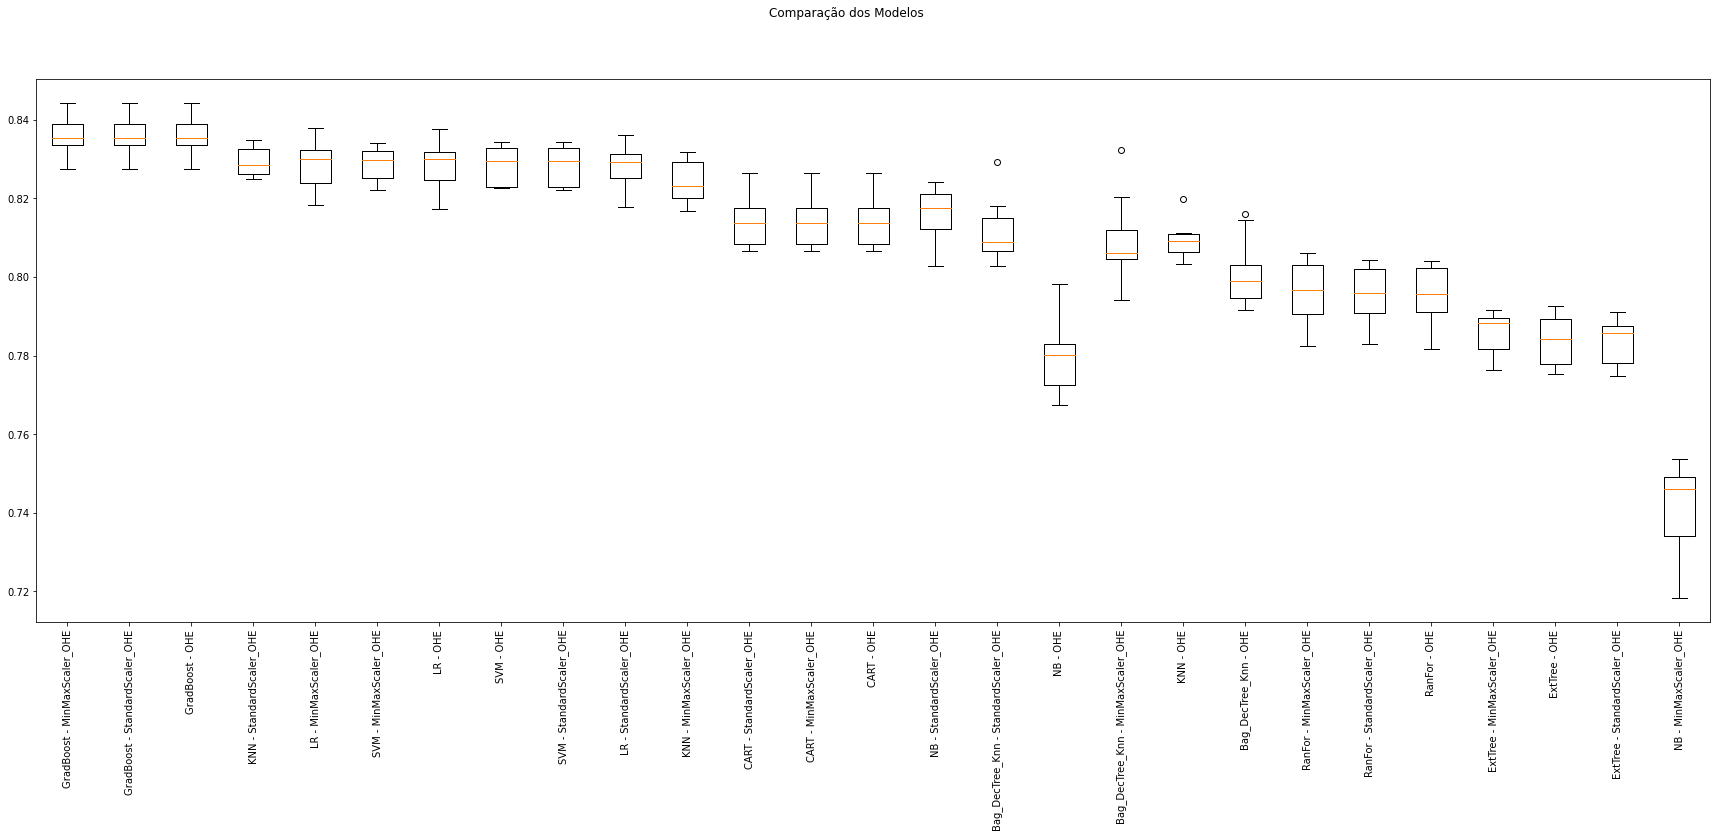

In [ ]:
# Comparação dos modelos
fig = plt.figure(figsize=(30,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90) 
plt.show()

Analisando os melhores modelos.

Os modelos que melhor performaram foram GradientBoosting, LogistRegression e SVM, que ficaram com score na faixa de 0,83. Além destes, vamos levar para a próxima fase o KNN, que aceita uma ampla variação de parâmetros e também teve um bom resultado.

### 5.2. Criação e avaliação de modelos: trabalhando com os melhores modelos do experimento inicial

Após os resultados do experimento inicial, iremos realizar uma maior variação dos hiperparâmetros para os algoritmos de melhor desempenho.

TERMINAR:

No caso da Regressão Logística, ...

No caso do KNN, iremos usar vários valores para k (número de vizinhos mais próximos) e todas as possíveis métricas de distância.

In [ ]:
# Preparando lista dos melhores modelos da fase exploratória com maior variabilidade de hiperparâmetros

models_final = []

# LogisticRegression
pgl = {}
models_final.append(('LR', LogisticRegression(solver='liblinear'), pgl))

gboost_num_trees = [100, 250, 500, 750]
# GradientBoostingClassifier
pggb = {
    'GradBoost__n_estimators': gboost_num_trees
}
models_final.append(('GradBoost', GradientBoostingClassifier(), pggb))

# KNN - hiperparâmetros que serão avaliados
k = [1,5,9,13,17,21,31,51]
distancias = ["minkowski", "euclidean", "manhattan"]
pgk = {
    'KNN__n_neighbors': k,
    'KNN__metric': distancias
}
models_final.append(('KNN', KNeighborsClassifier(), pgk))

# SVM - muito lento
c_values = [0.1, 1]  # de acordo com a documentação do scikit-learn, uma boa prática é espaçar os valores de C e gamma exponencialmente
#gamma_values = [0.1, 1] #gamma_values = [0.1, 1.0, 10] # de acordo com a documentação do scikit-learn, uma boa prática é espaçar os valores de C e gamma exponencialmente
kernel_values = ['linear', 'rbf']
pgs = {
    'SVM__C': c_values,
    #'SVM__gamma': gamma_values,
    'SVM__kernel': kernel_values
}
models_final.append(('SVM', SVC(gamma='auto'), pgs))

In [ ]:
res_final = trainModels(models_final, preprocessamento, X_train, y_train)

Início do processo de treinamento :  21:23:11
Modelo : LR
   Dataset.............: OHE
   Horário de início...: 21:23:11
   Melhor resultado....: 0.8284563632856565
   Melhores parâmetros.: {}
   Tempo de execução...: 10.851003885269165

   Dataset.............: StandardScaler_OHE
   Horário de início...: 21:23:22
   Melhor resultado....: 0.8280590122922792
   Melhores parâmetros.: {}
   Tempo de execução...: 11.743170499801636

   Dataset.............: MinMaxScaler_OHE
   Horário de início...: 21:23:33
   Melhor resultado....: 0.8285888136167825
   Melhores parâmetros.: {}
   Tempo de execução...: 10.142035484313965

Modelo : GradBoost
   Dataset.............: OHE
   Horário de início...: 21:23:43
   Melhor resultado....: 0.8359606350913493
   Melhores parâmetros.: {'GradBoost__n_estimators': 500}
   Tempo de execução...: 729.9494590759277

   Dataset.............: StandardScaler_OHE
   Horário de início...: 21:35:53
   Melhor resultado....: 0.8357839372312463
   Melhores parâmetros.:

In [ ]:
# analisando os dez melhores modelos e seus metodos de pré processamento
res_final.iloc[0:10,:]

,classificador,preprocessamento,parametros,modelo,score,cv_results,n_splits
3,GradBoost,OHE,{'GradBoost__n_estimators': 500},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835961,"{'mean_fit_time': [5.060283827781677, 11.22561...",10
5,GradBoost,MinMaxScaler_OHE,{'GradBoost__n_estimators': 500},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835784,"{'mean_fit_time': [4.804286336898803, 10.96413...",10
4,GradBoost,StandardScaler_OHE,{'GradBoost__n_estimators': 100},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.835784,"{'mean_fit_time': [4.971692037582398, 11.34521...",10
7,KNN,StandardScaler_OHE,"{'KNN__metric': 'manhattan', 'KNN__n_neighbors...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.831678,"{'mean_fit_time': [0.9692543029785157, 0.96974...",10
10,SVM,StandardScaler_OHE,"{'SVM__C': 1, 'SVM__kernel': 'rbf'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.830001,"{'mean_fit_time': [23.063216829299925, 32.9667...",10
11,SVM,MinMaxScaler_OHE,"{'SVM__C': 1, 'SVM__kernel': 'linear'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.829074,"{'mean_fit_time': [23.242392778396606, 35.8766...",10
9,SVM,OHE,"{'SVM__C': 1, 'SVM__kernel': 'linear'}","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828898,"{'mean_fit_time': [40.82587456703186, 35.82396...",10
2,LR,MinMaxScaler_OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828589,"{'mean_fit_time': [0.8789040803909302], 'std_f...",10
0,LR,OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828456,"{'mean_fit_time': [0.9498352766036987], 'std_f...",10
1,LR,StandardScaler_OHE,{},"(ColumnTransformer(n_jobs=None, remainder='dro...",0.828059,"{'mean_fit_time': [1.0352850198745727], 'std_f...",10


Analisando os resultandos com Boxplot

In [ ]:
# gerando o nome dos atributos que armazenam os scores do cross-validation no grid search
splits = []
for i in range(kfold.n_splits):
  splits.append(f"split{i}_test_score")

# recuperando os valores do cross-validation para o melhor conjunto de parâmetros
results = []
names = []
for model_name, preprocesser, cv_result in zip(res_final['classificador'], res_final['preprocessamento'], res_final['cv_results']):
  result = []
  for i in range(kfold.n_splits):
    result.append(cv_result[splits[i]][cv_result['rank_test_score'][0] - 1])
  results.append(result)
  names.append(f"{model_name} - {preprocesser}")

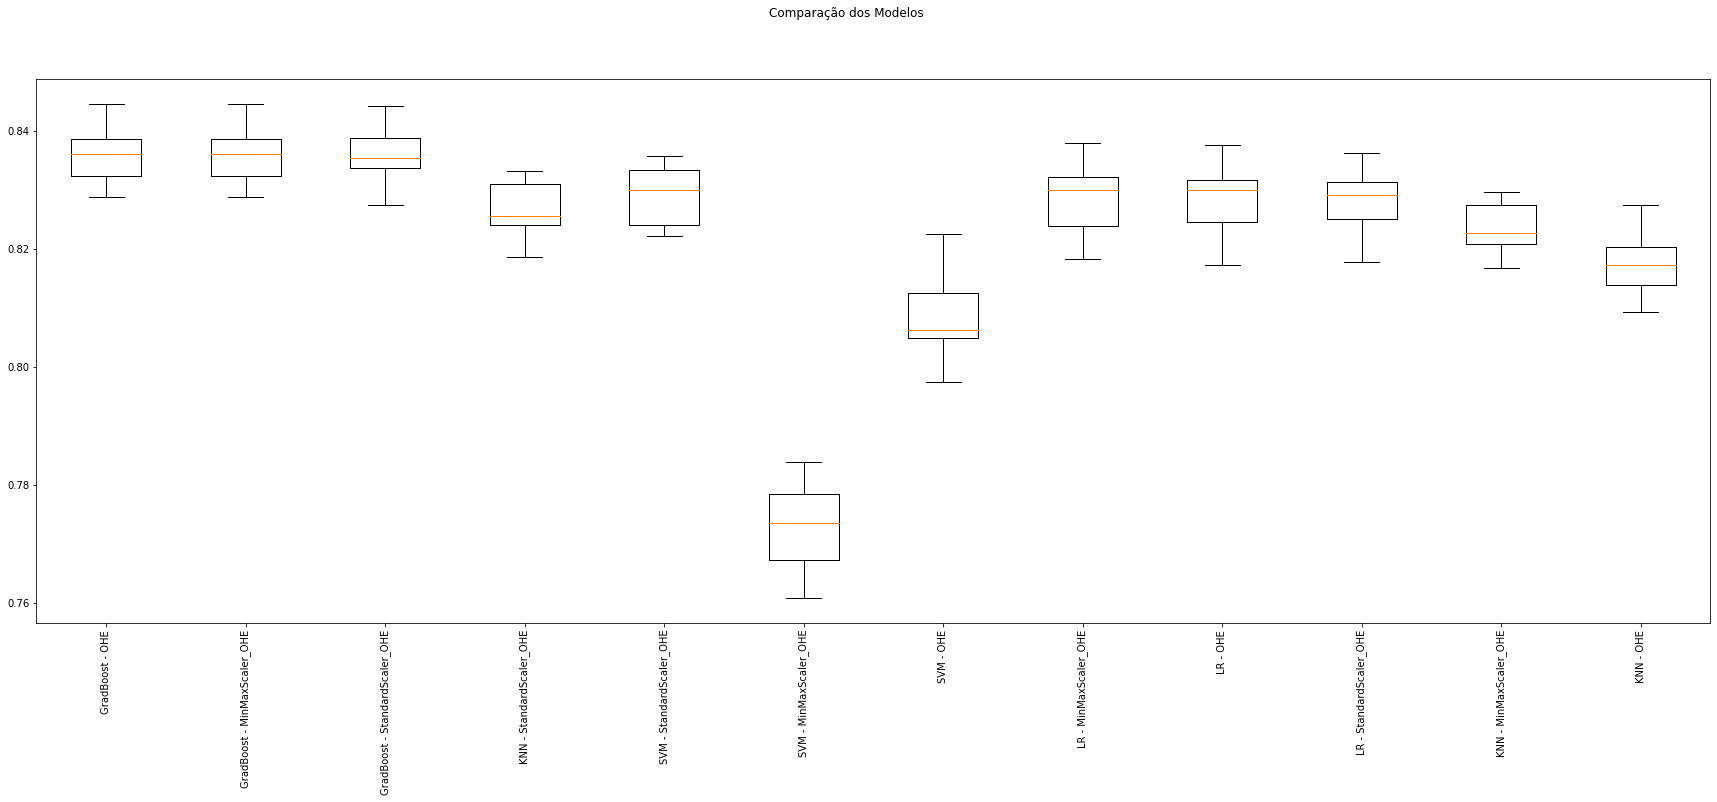

In [ ]:
# Comparação dos modelos
fig = plt.figure(figsize=(30,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90) 
plt.show()

In [ ]:
#detalhamento do LogisticRegression
lr_models = []

pglr_liblinear = {'LR_liblinear__penalty': ['l1', 'l2'],
                  'LR_liblinear__max_iter': [100, 500, 1000]}

lr_models.append(('LR_liblinear', LogisticRegression(solver='liblinear'), pglr_liblinear))

pglr_saga = {'LR_saga__penalty': ['elasticnet'],
             'LR_saga__max_iter': [100, 500, 1000],
             'LR_saga__l1_ratio': [0,   # igual a l2
                                   0.5, # combinação de l1 e l2
                                   1]}  # igual a l1}

lr_models.append(('LR_saga', LogisticRegression(solver='saga'), pglr_saga))

In [ ]:
res_lr_models = trainModels(lr_models, preprocessamento, X_train, y_train)

Início do processo de treinamento :  10:35:04
Modelo : LR_liblinear
   Dataset.............: OHE
   Horário de início...: 10:35:04
   Melhor resultado....: 0.8284563632856565
   Melhores parâmetros.: {'LR_liblinear__max_iter': 100, 'LR_liblinear__penalty': 'l2'}
   Tempo de execução...: 75.9683485031128

   Dataset.............: StandardScaler_OHE
   Horário de início...: 10:36:20
   Melhor resultado....: 0.828103298788697
   Melhores parâmetros.: {'LR_liblinear__max_iter': 100, 'LR_liblinear__penalty': 'l1'}
   Tempo de execução...: 75.38249349594116

   Dataset.............: MinMaxScaler_OHE
   Horário de início...: 10:37:36
   Melhor resultado....: 0.8285888136167825
   Melhores parâmetros.: {'LR_liblinear__max_iter': 100, 'LR_liblinear__penalty': 'l2'}
   Tempo de execução...: 82.72725200653076

Modelo : LR_saga
   Dataset.............: OHE
   Horário de início...: 10:38:58
   Melhor resultado....: 0.8294275098441497
   Melhores parâmetros.: {'LR_saga__l1_ratio': 0, 'LR_saga__max_i

In [ ]:
res_lr_models.iloc[0:10,:]

,classificador,preprocessamento,parametros,modelo,score,cv_results,n_splits
3,LR_saga,OHE,"{'LR_saga__l1_ratio': 0, 'LR_saga__max_iter': ...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.829428,"{'mean_fit_time': [2.484603476524353, 9.899328...",10
2,LR_liblinear,MinMaxScaler_OHE,"{'LR_liblinear__max_iter': 100, 'LR_liblinear_...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828589,"{'mean_fit_time': [1.8716732501983642, 0.80218...",10
5,LR_saga,MinMaxScaler_OHE,"{'LR_saga__l1_ratio': 0, 'LR_saga__max_iter': ...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828545,"{'mean_fit_time': [1.2373758792877196, 1.22300...",10
0,LR_liblinear,OHE,"{'LR_liblinear__max_iter': 100, 'LR_liblinear_...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828456,"{'mean_fit_time': [1.5513430118560791, 0.82781...",10
4,LR_saga,StandardScaler_OHE,"{'LR_saga__l1_ratio': 0, 'LR_saga__max_iter': ...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828147,"{'mean_fit_time': [2.3461498737335207, 2.35735...",10
1,LR_liblinear,StandardScaler_OHE,"{'LR_liblinear__max_iter': 100, 'LR_liblinear_...","(ColumnTransformer(n_jobs=None, remainder='dro...",0.828103,"{'mean_fit_time': [1.624411416053772, 0.804432...",10


In [ ]:
# gerando o nome dos atributos que armazenam os scores do cross-validation no grid search
splits = []
for i in range(kfold.n_splits):
  splits.append(f"split{i}_test_score")

# recuperando os valores do cross-validation para o melhor conjunto de parâmetros
results = []
names = []
for model_name, preprocesser, cv_result in zip(res_lr_models['classificador'], res_lr_models['preprocessamento'], res_lr_models['cv_results']):
  result = []
  for i in range(kfold.n_splits):
    result.append(cv_result[splits[i]][cv_result['rank_test_score'][0] - 1])
  results.append(result)
  names.append(f"{model_name} - {preprocesser}")

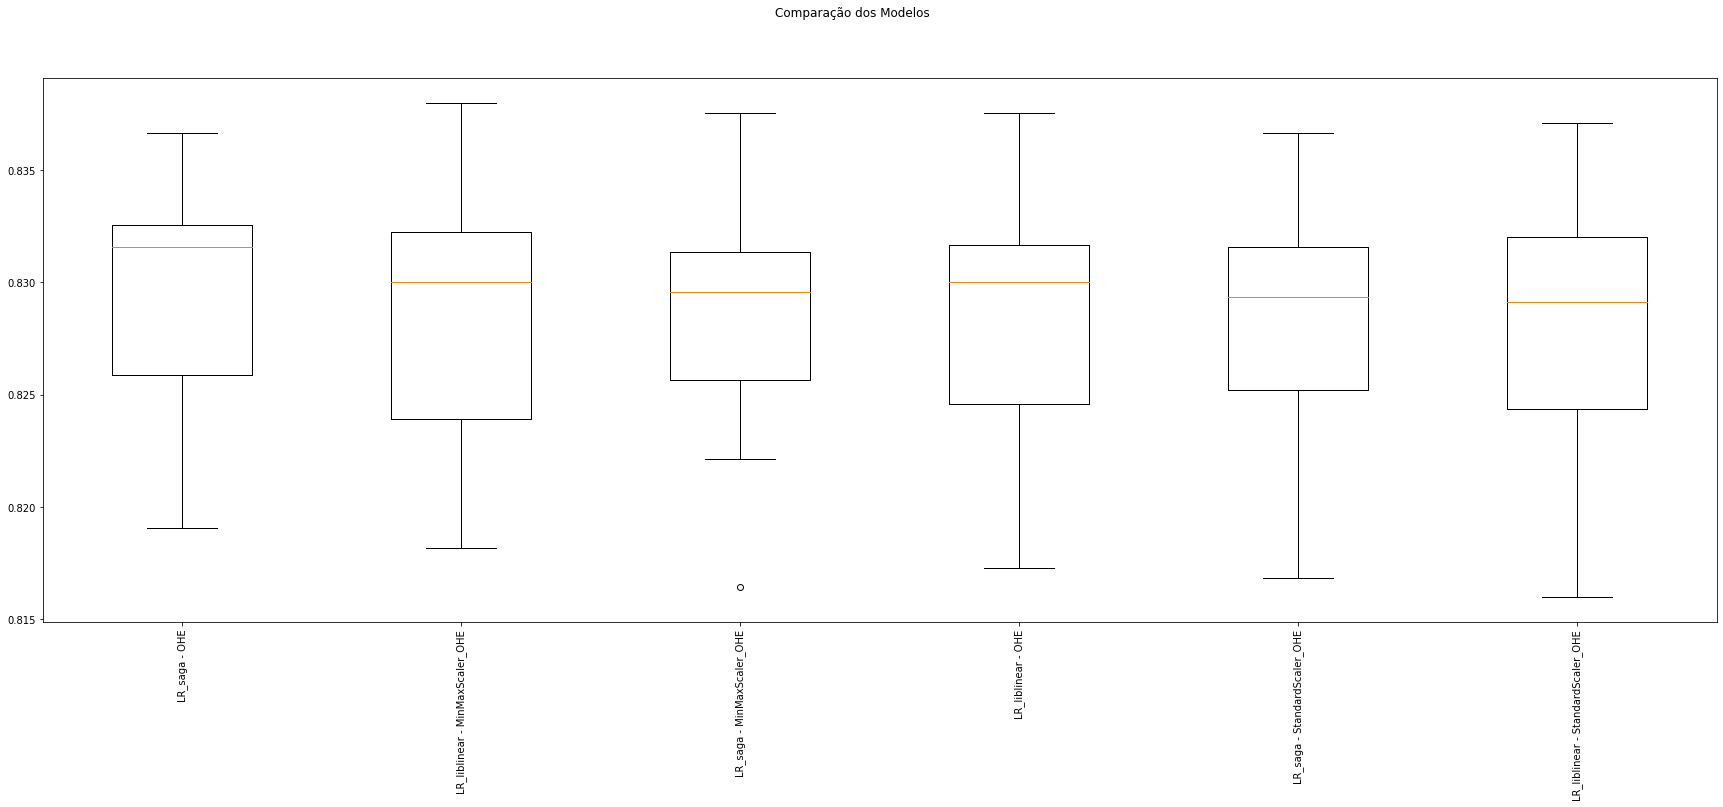

In [ ]:
# Comparação dos modelos
fig = plt.figure(figsize=(30,10)) 
fig.suptitle('Comparação dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names, rotation=90) 
plt.show()

Os resultados mostram que:

EXEMPLOS:

a melhor configuração encontrada utiliza distância de manhattan e k = 17. Isto significa que o algoritmo fará previsões usando as 17 instâncias mais semelhantes.

Podemos ver que a configuração que alcançou a maior acurácia foi o modelo que utilizou kernel linear e C = 0,1. Esta acurácia é a mais alta que conseguimos até o momento.

### 5.3. Ajuste dos Modelos

#### Ajuste do KNN

Vamos começar ajustando parâmetros como o número de vizinhos e as métricas de distância para o KNN. Para tal, tentaremos todos os valores ímpares de k entre 1 a 21 e as métricas de distância euclidiana, manhattan e minkowski. Usando o pipeline, cada valor de k e de distância será avaliado usando a validação cruzada 10-fold no conjunto de dados padronizado, que mostrou melhores resultados do que os dados originais.

In [ ]:
np.random.seed(7) # definindo uma semente global

# https://scikit-learn.org/stable/tutorial/statistical_inference/putting_together.html

# Tuning do KNN

kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'knn__metric': ["euclidean", "manhattan", "minkowski"],
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)

grid.fit(X_train, Y_train)

print("Melhor: %f usando %s" % (grid.best_score_, grid.best_params_)) 

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f): %r" % (mean, stdev, param))

Os resultados mostram que a melhor configuração encontrada utiliza distância de manhattan e k = 17. Isto significa que o algoritmo fará previsões usando as 17 instâncias mais semelhantes.

#### Ajuste do SVM
Iremos ajustar dois dos principais hiperparâmetros do algoritmo SVM: o valor de C (o quanto flexibilizar a margem) e o tipo de kernel utilizado. No Scikit-Learn, o padrão para o algoritmo SVM (implementado pela classe SVC) é usar o kernel da Função Base Radial (RBF) e o valor C definido como 1.0. 

Iremos testar outros valores para estes hiperparâmetros, e cada combinação de valores será avaliada usando a função GridSearchCV, como fizemos anteriormente para o KNN.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'svc__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

Podemos ver que a configuração que alcançou a maior acurácia foi o modelo que utilizou kernel linear e C = 0,1. Esta acurácia é a mais alta que conseguimos até o momento.

## 6. Métodos Ensemble

Outra maneira de melhorar o desempenho dos algoritmos é usar métodos de ensemble. Avaliaremos quatro modelos diferentes, sendo dois métodos de Boosting e dois de Bagging:
* Métodos de Boosting: AdaBoost (AB) e Gradient Boosting (GBM).
* Métodos de Bagging: Random Forests (RF) e Extra Trees (ET).

Usaremos novamente a validação cruzada 10-fold. Nenhuma padronização de dados será usada neste caso porque todos os quatro algoritmos de conjunto são baseados em árvores de decisão, que são modelos menos sensíveis às distribuições de dados.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Ensembles

ensembles = []

ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=10))) 
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10))) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Vamos comparar os resultados graficamente:

In [ ]:
# Comparação de modelos
fig = plt.figure()
fig.suptitle('Comparação de modelos Ensemble') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)
plt.show()

Os resultados sugerem que o GBM e o ET são provavelmente, os melhores modelos, podendo ser ainda aprimorados com variações de parâmetros. Experimente variar, como exercício, para verificar se é possível encontrar uma configuração de modelo que supere os resultados do SVM.

Vamos experimentar os mesmos ensembles, com os dados padronizados, e veremos que o resultado será muito similar aos dados não-padronizados.

In [ ]:
np.random.seed(7) # definindo uma semente global

# Padronização do dataset
pipelines = []
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())]))) 
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

## 7. Finalização do Modelo

Até aqui, verificamos que o SVM com kernel linear e C = 0,1 foi o modelo que mostrou melhor acurácia para o problema. A seguir, finalizaremos este modelo, treinando-o em todo o conjunto de dados de treinamento (sem validação cruzada) e faremos predições para o conjunto de dados de teste que foi separado logo no início do exemplo, a fim de confirmarmos nossas descobertas.

Primeiro, iremos realizar a padronização dos dados de entrada. Depois, exibiremos a acurácia e a matriz de confusão:

In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=0.1, kernel='linear')
model.fit(rescaledX, Y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Por meio do conjunto de teste, verificamos que alcançamos uma acurácia de 79,22% em dados não vistos. Este resultado foi ainda melhor do que as nossas expectativas, pois durante o ajuste do SVM obtivemos uma acurácia estimada de 78,00%. Valores semelhantes são esperados quando este modelo estiver executando em produção e fazendo predições para novos dados.

Vamos agora preparar o modelo para utilização. Para isso, vamos treiná-lo com todo o dataset, e não apenas o conjunto de treino.

In [ ]:
# Preparação do modelo com TODO o dataset (e não apenas a base de treino)
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)
model = SVC(C=0.1, kernel='linear')
model.fit(rescaledX, Y)

## 8. Aplicando o modelo em dados não vistos

Agora imagine que chegaram 3 novas instâncias, mas não sabemos a classe de saída. Podemos então aplicar nosso modelo recém-treinado para estimar as classes! Para tal, será necessário antes padronizar os dados (usando a mesma escala dos dados usados treinamento do modelo!).

In [ ]:
# Novos dados - não sabemos a classe!
data = {'preg':  [1, 9, 5],
        'plas': [90, 100, 110],
        'pres': [50, 60, 50],
        'skin': [30, 30, 30],
        'test': [100, 100, 100],
        'mass': [20.0, 30.0, 40.0],
        'pedi': [1.0, 2.0, 1.0],
        'age': [15, 40, 40],  
        }

atributos = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)
print(X_entrada)

In [ ]:
# Padronização nos dados de entrada
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

In [ ]:
# Estimativa de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

## 9. Pré-processamento de dados: Tratamento de Missings

Vamos ver como seria o fluxo se quiséssemos tratar os missings do nosso dataset, o que ocorreria na etapa 4 - Pré-processamento de dados, e continuar o fluxo a partir daí.

In [ ]:
# verificando nulls no dataset
dataset.isnull().sum()

In [ ]:
# salvando um novo dataset para tratamento de missings

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# substituindo os zeros por NaN
atributos.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# removendo as colunas 'skin' e 'test'
atributos.drop(['skin', 'test'], axis=1, inplace= True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# substituindo os NaN de 'preg' por 0
atributos['preg'].fillna(0, inplace=True)

# substituindo os NaN de 'plas', 'pres'e 'mass' pela mediana da coluna
atributos['plas'].fillna(atributos['plas'].median(), inplace=True)
atributos['pres'].fillna(atributos['pres'].median(), inplace=True)
atributos['mass'].fillna(atributos['mass'].median(), inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

In [ ]:
# Guardando o novo dataset para testes futuros
datasetSemMissings = atributos

# incluindo a coluna 'class' no novo dataset
datasetSemMissings['class'] = dataset['class']

# exibindo as primeiras linhas
datasetSemMissings.head()

## 10. Modelagem com Dados Padronizados e Normalizados

In [ ]:
# Separação em conjuntos de treino e teste
array = datasetSemMissings.values
X = array[:,0:6].astype(float)
Y = array[:,6]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
    test_size=test_size, random_state=seed)

In [ ]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [ ]:
# Criação dos modelos
models = []
models.append(('LR', LogisticRegression(solver='liblinear'))) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [ ]:
# Avaliação dos modelos
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

In [ ]:
# Padronização do dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

In [ ]:
# Normalização do dataset
pipelines = []
pipelines.append(('ScaledMinMaxLR', Pipeline([('Scaler', MinMaxScaler()),('LR', LogisticRegression(solver='liblinear'))]))) 
pipelines.append(('ScaledMinMaxKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledMinMaxCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledMinMaxNB', Pipeline([('Scaler', MinMaxScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledMinMaxSVM', Pipeline([('Scaler', MinMaxScaler()),('SVM', SVC(gamma='auto'))])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

In [ ]:
np.random.seed(7) # definindo uma semente global

# Tuning do SVM

kfold = KFold(n_splits=num_folds)

pipeline = Pipeline(steps=[('Scaler', StandardScaler()), ('svc', SVC(gamma='auto'))])

# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'svc__C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_)) 

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f): %r" % (mean, stdev, param))

O SVM com kernel sigmoid e C = 0,1 até o momento foi o modelo que mostrou melhor acurácia para o problema, mas ainda assim, verificamos que o tratamento de missings não melhorou a acurácia anterior. Sendo assim, o fluxo será interrompido, sendo melhor utilizar o dataset completo para treinamento, neste caso.

## Resumo

Resumidamente, neste exemplo trabalhamos com um problema de classificação binária de ponta a ponta. As etapas abordadas foram:
* Definição do problema (Pima Indians Diabetes).
* Carga dos dados
* Análise dos dados (verificamos que estavam na mesma escala, mas com diferentes distribuições de dados).
* Avaliação de modelos de linha base (até aqui, o KNN era o melhor).
* Avaliação de modelos com padronização dos dados (até aqui, KNN e SVM eram os melhores).
* Ajuste dos modelos (a melhor configuração do KNN foi com k = 1 e métrica de distância euclidiana e a melhor configuração do SVM foi com kernel linear e C = 0.1).
* Métodos de ensemble (não performaram tão bem quanto SVM)
* Finalização do modelo (use todos os dados de treinamento e valide usando o conjunto de dados de teste).

Depois, experimentamos fazer o tratamento de missings no dataset, mas como os resultados alcançados foram piores em termos de acurácia, interrompemos o fluxo.

É importante ressaltar que este exemplo não buscou ser exaustivo, apresentando apenas uma parte dos muitos recursos disponíveis na biblioteca Scikit-Learn para que você compreenda em linhas gerais o seu funcionamento. Por exemplo, poderíamos ter testado outras operações de pré-processamento de dados, outros valores de hiperparâmetros e ainda, outros modelos de classificação, como os ensembles. Recomendamos que você explore a documentação disponível e incremente este exemplo com novas possibilidades.